In [1]:
# load necessary libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [2]:
# download dataframe (sales in Rossmann Supermarkets)
df = pd.read_csv('path_to_file', low_memory=False)

In [3]:
# info about data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Unnamed: 0                 1017209 non-null  int64  
 1   Date                       1017209 non-null  object 
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Store                      1017209 non-null  int64  
 5   DayOfWeek                  1017209 non-null  int64  
 6   Open                       1017209 non-null  int64  
 7   Promo                      1017209 non-null  int64  
 8   StateHoliday               1017209 non-null  object 
 9   SchoolHoliday              1017209 non-null  int64  
 10  StoreType                  1017209 non-null  object 
 11  Assortment                 1017209 non-null  object 
 12  CompetitionDistance        1014567 non-null  float64
 13  CompetitionO

,Unnamed: 0,Sales,Customers,Store,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.086050e+05,5.773819e+03,6.331459e+02,5.584297e+02,3.998341e+00,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,2.936431e+05,3.849926e+03,4.644117e+02,3.219087e+02,1.997391e+00,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.543030e+05,3.727000e+03,4.050000e+02,2.800000e+02,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.086050e+05,5.744000e+03,6.090000e+02,5.580000e+02,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,7.629070e+05,7.856000e+03,8.370000e+02,8.380000e+02,6.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.017209e+06,4.155100e+04,7.388000e+03,1.115000e+03,7.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


Description of necessary columns
Sales - amount of sales in euro, Customers - number of customers, DayOfWeek, Promo - promotions (0 or 1)

We need to clean raw data, because of outliers, to get better regression results

In [4]:
# data conversion
df = df.iloc[:, [2,3,4,5,7]]
df = df.loc[(df.Sales>0)&(df.Customers > 0) ,:] # a lot of zero-outliers
df = df.loc[(df.Sales<=12296)&(df.Customers <= 1300)&(df.Customers>55) ,:] # drop ouliers using interquartile range rule

<AxesSubplot: >

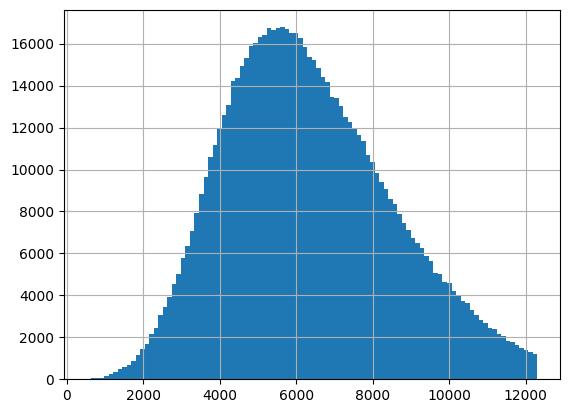

In [5]:
# smooth hist because of previous iterations
df.Sales.hist(bins = 100)

<AxesSubplot: >

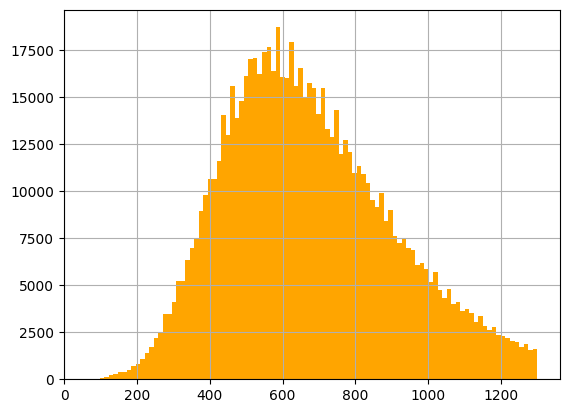

In [6]:
# smooth hist because of previous iterations
df.Customers.hist(bins = 100, color = 'orange')

{'whiskers': [<matplotlib.lines.Line2D at 0x12265dae0>,
 'caps': [<matplotlib.lines.Line2D at 0x12265e020>,
 'boxes': [<matplotlib.lines.Line2D at 0x12265d840>],
 'medians': [<matplotlib.lines.Line2D at 0x12265e560>],
 'fliers': [<matplotlib.lines.Line2D at 0x12265eaa0>],
 'means': [<matplotlib.lines.Line2D at 0x12265e800>]}

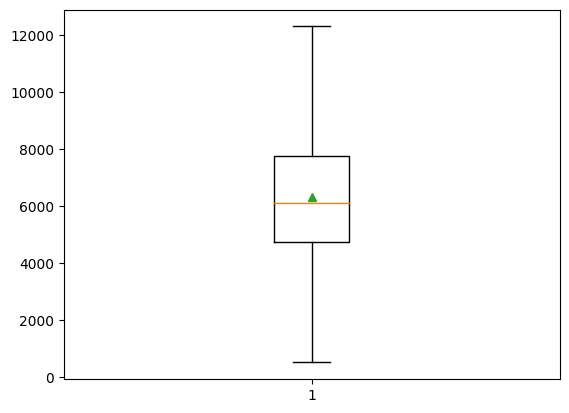

In [7]:
# there are no outliers 
plt.boxplot(df['Sales'], showfliers = True, showmeans = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1226d11e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1226d1720>,
 'boxes': [<matplotlib.lines.Line2D at 0x1226d0f40>],
 'medians': [<matplotlib.lines.Line2D at 0x1226d1c60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1226d21a0>],
 'means': [<matplotlib.lines.Line2D at 0x1226d1f00>]}

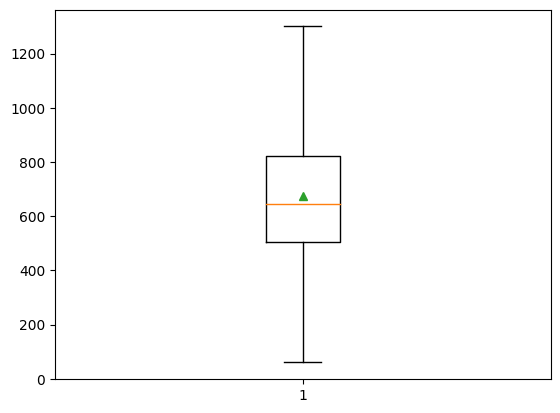

In [8]:
# there are no outliers 
plt.boxplot(df['Customers'], showfliers = True, showmeans = True)

In [9]:
# correlation matrix
print(df.corr())
print(df.corr(method = 'spearman'))

              Sales  Customers     Store  DayOfWeek     Promo
Sales      1.000000   0.781713 -0.004568  -0.179920  0.427406
Customers  0.781713   1.000000  0.028394  -0.136260  0.244713
Store     -0.004568   0.028394  1.000000   0.000677 -0.000794
DayOfWeek -0.179920  -0.136260  0.000677   1.000000 -0.269777
Promo      0.427406   0.244713 -0.000794  -0.269777  1.000000
              Sales  Customers     Store  DayOfWeek     Promo
Sales      1.000000   0.793062 -0.007173  -0.165639  0.429805
Customers  0.793062   1.000000  0.026471  -0.137115  0.253981
Store     -0.007173   0.026471  1.000000   0.000584 -0.000833
DayOfWeek -0.165639  -0.137115  0.000584   1.000000 -0.270675
Promo      0.429805   0.253981 -0.000833  -0.270675  1.000000


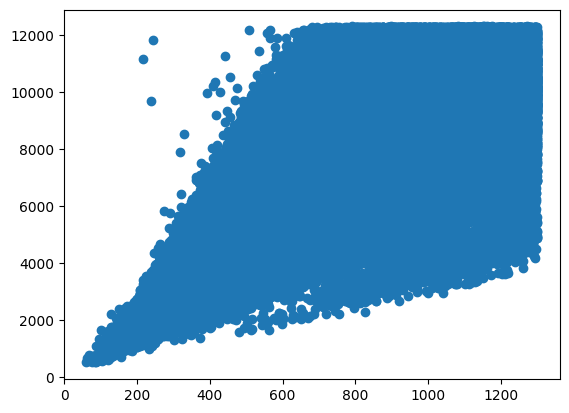

In [10]:
# scatter plot
print(plt.scatter(x = df['Customers'], y = df['Sales']))

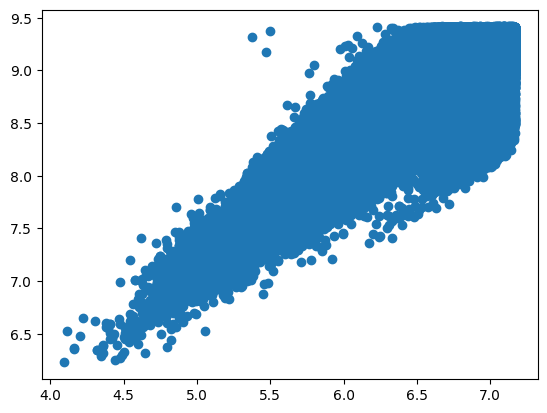

In [11]:
# scatter plot, better than previous
print(plt.scatter(x = np.log(df['Customers']), y = np.log(df['Sales'])))

In [12]:
# OLS regression 
m = smf.ols(formula = 'np.log(Sales) ~ np.log(Customers) + DayOfWeek + Promo', data = df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(Sales)   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                 6.570e+05
Date:                Sun, 16 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:21:43   Log-Likelihood:             1.6295e+05
No. Observations:              769693   AIC:                        -3.259e+05
Df Residuals:                  769689   BIC:                        -3.258e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.5587      0.004    843.713      0.000       3.550       3.567
np.log(Customers)     0.7855      0.001   1213.187      0.000       0.784       0.787
DayOfWeek            -0.0026      0.000    -19.041      0.000      -0.003      -0.002
Promo                 0.1636      0.000    340.060      0.000       0.163       0.165
==============================================================================
Omnibus:                     4451.501   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4698.028
Skew:                          -0.165   Prob(JB):                         0.00
Kurtosis:                       3.194   Cond. No.                         143.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We assume that there are both heteroscedastisity (view scatter plot) ans autocorrelation;
let us check, using formal tests

In [13]:
sms.het_breuschpagan(m.resid, m.model.exog) # there is heteroscedastisity, because p-value < [0.01, 0.05, 0.1]

(4009.4420098649134, 0.0, 1343.472064461152, 0.0)

In [14]:
sms.acorr_breusch_godfrey(m, nlags=1)# there is autocorrelation, because p-value < [0 .01, 0.05, 0.1]

(5467.782076854592, 0.0, 5508.57089824894, 0.0)

Let's estimate regression results usinig robust standart error to elimitate influence of heteroscedastisity and autocorrelation

In [15]:
m.get_robustcov_results(cov_type='HAC', maxlags = 1).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(Sales)   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                 6.043e+05
Date:                Sun, 16 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:21:44   Log-Likelihood:             1.6295e+05
No. Observations:              769693   AIC:                        -3.259e+05
Df Residuals:                  769689   BIC:                        -3.258e+05
Df Model:                           3                                         
Covariance Type:                  HAC                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.5587      0.004    794.478      0.000       3.550       3.568
np.log(Customers)     0.7855      0.001   1146.502      0.000       0.784       0.787
DayOfWeek            -0.0026      0.000    -17.925      0.000      -0.003      -0.002
Promo                 0.1636      0.000    329.414      0.000       0.163       0.165
==============================================================================
Omnibus:                     4451.501   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4698.028
Skew:                          -0.165   Prob(JB):                         0.00
Kurtosis:                       3.194   Cond. No.                         143.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""

After implementing robust standard errors all coefs remain signinficant;
R-square is 0.719;
Model can be applied;
Final model equation looks like this: ln(Sales) = 3.56 + 0.78 * ln(Customers) - 0.0026 * DayOfWeek + 0.164 * Promo